In [48]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error

from matplotlib import ticker
import matplotlib.pyplot as plt

In [49]:
!pip install pmdarima
from pmdarima.arima import auto_arima

# Train test 8:2

In [50]:
df = pd.read_csv('/content/VCB.VN-BaoCao.csv')

In [51]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,40478.953125,41275.257813,40346.234375,41275.257813,41275.257813,1225908.0
1,2019-03-04,41275.257813,41806.132813,41275.257813,41673.414063,41673.414063,2030592.0
2,2019-03-05,41673.414063,42337.003906,41474.335938,41806.132813,41806.132813,2376092.0
3,2019-03-06,41872.488281,42005.207031,41076.183594,41607.054688,41607.054688,2107101.0
4,2019-03-07,41607.054688,42337.003906,41540.695313,41872.488281,41872.488281,3091640.0


In [52]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [53]:
# Split the data into training, testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

In [54]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [55]:
# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=0, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(model.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=17633.517, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=26107.492, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=17635.037, Time=0.51 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=17635.183, Time=0.44 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=1.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=17636.606, Time=1.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=17631.368, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20820.089, Time=0.95 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=17633.018, Time=0.44 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=17633.327, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=22107.2

In [56]:
order = (model.order[0], model.order[1], model.order[2])
print(order)

(1, 0, 1)


In [57]:
from statsmodels.tsa.arima.model import ARIMA
def evaluate_ariama_model(x_data, y_data, order):
    y_pred = list()
    history = [x for x in y_train]
    for t in range(len(y_data)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        y_pred.append(yhat)
        obs = y_data[t]
        history.append(obs)
    mse = mean_squared_error(y_data, y_pred)
    mae = mean_absolute_error(y_data, y_pred)
    mape = mean_absolute_percentage_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

In [58]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred, test_mse, test_mae, test_mape, test_rmse = evaluate_ariama_model(x_test, y_test, order)

print("Price predict on test data:", y_pred)
print("MSE on test data:", test_mse)
print("MAE on test data:", test_mae)
print("MAPE on test data:", test_mape)
print("RMSE on test data:", test_rmse)

Price predict on test data: [77812.91441303567, 76949.19850484334, 78543.55374664703, 77538.96595303426, 78350.7131976276, 78501.65080843029, 80409.98541456954, 79660.73425023186, 78725.70618767804, 78491.83923069765, 78325.01017394665, 78851.38432834082, 77794.46416403179, 78778.8679394704, 79968.47213463427, 79501.2758194413, 79427.65872060001, 80298.46637020937, 82972.25012158674, 83766.65126089746, 81999.12156387046, 84657.24635132466, 85023.35503924038, 85448.8511231377, 86742.84402264399, 86795.21851323024, 87577.60685878669, 88863.37204707475, 85960.12513390143, 84465.73461292568, 84595.91452138519, 84940.88488705145, 84495.6328210666, 84596.08039390933, 84593.63406084184, 85551.86909603176, 86222.04369104699, 84548.77195754538, 84596.24169596954, 84595.33334148856, 86336.07634335966, 85158.35788492304, 88912.78540114667, 86849.08250724312, 87142.1039158472, 87999.01920173065, 88760.69177134692, 88834.35114270073, 88661.247337704, 88233.35872578417, 90135.79288697241, 88815.7942

In [59]:
last_index = len(df)-1

# Create arrays for 90 days
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict for the next 30 days
y_next_90_days = list()
history = [x for x in y_test]
for t in range(len(x_next_90_days)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    y_next_90_days.append(yhat)
    history.append(yhat)



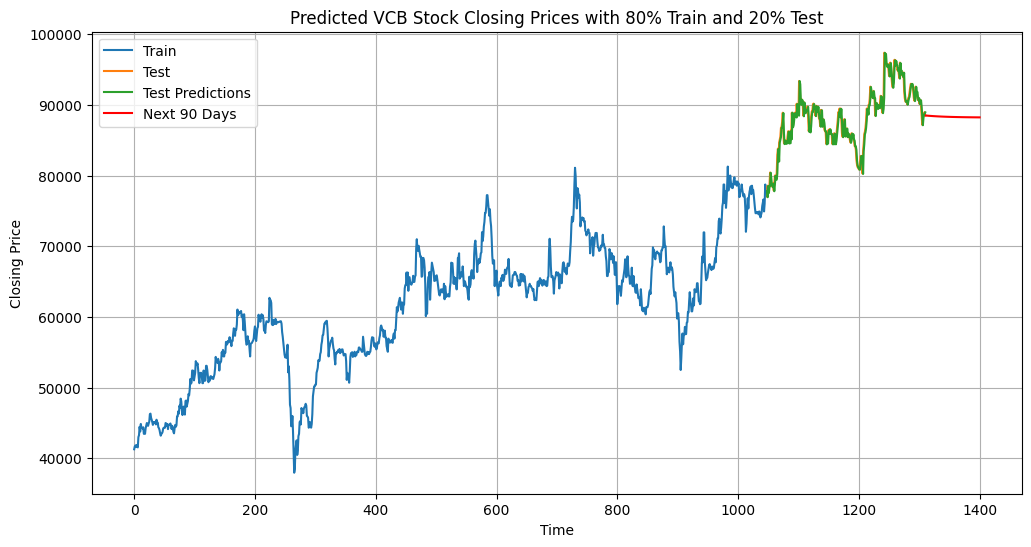

In [60]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, color='red', label='Next 90 Days')

# Adding titles and labels
plt.title('Predicted VCB Stock Closing Prices with 80% Train and 20% Test')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 7:3

In [61]:
df = pd.read_csv('/content/VCB.VN-BaoCao.csv')

In [62]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,40478.953125,41275.257813,40346.234375,41275.257813,41275.257813,1225908.0
1,2019-03-04,41275.257813,41806.132813,41275.257813,41673.414063,41673.414063,2030592.0
2,2019-03-05,41673.414063,42337.003906,41474.335938,41806.132813,41806.132813,2376092.0
3,2019-03-06,41872.488281,42005.207031,41076.183594,41607.054688,41607.054688,2107101.0
4,2019-03-07,41607.054688,42337.003906,41540.695313,41872.488281,41872.488281,3091640.0


In [63]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [64]:
# Split the data into training, testing sets
train_size = int(0.7 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

In [65]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [66]:
# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=0, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(model.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15355.120, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15352.242, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15353.157, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15353.143, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15350.562, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.583 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  917
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -7674.281
Date:                Wed, 19 Jun 2024   AIC                          15350.562
Time:                        15:23:32   BIC                          15355.382
Sample:                             0   HQIC                         15352.401
                                - 917                                  

In [67]:
order = (model.order[0], model.order[1], model.order[2])
print(order)

(0, 1, 0)


In [68]:
from statsmodels.tsa.arima.model import ARIMA
def evaluate_ariama_model(x_data, y_data, order):
    y_pred = list()
    history = [x for x in y_train]
    for t in range(len(y_data)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        y_pred.append(yhat)
        obs = y_data[t]
        history.append(obs)
    mse = mean_squared_error(y_data, y_pred)
    mae = mean_absolute_error(y_data, y_pred)
    mape = mean_absolute_percentage_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

In [69]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred, test_mse, test_mae, test_mape, test_rmse = evaluate_ariama_model(x_test, y_test, order)

print("Price predict on test data:", y_pred)
print("MSE on test data:", test_mse)
print("MAE on test data:", test_mae)
print("MAPE on test data:", test_mape)
print("RMSE on test data:", test_rmse)

Price predict on test data: [59271.804688, 60711.261719, 60626.585938, 62235.394531, 63505.503906, 62320.066406, 61812.023438, 60795.9375, 60795.9375, 61473.328125, 62658.765625, 61642.675781, 63928.875, 63590.179688, 63505.503906, 63590.179688, 64775.613281, 64775.613281, 63505.503906, 62235.394531, 62235.394531, 61812.023438, 61896.699219, 64944.960938, 67569.859375, 68585.945313, 67739.203125, 71972.90625, 71972.90625, 67739.203125, 66469.09375, 65198.984375, 65453.007813, 65537.679688, 66215.070313, 66723.117188, 67315.835938, 67485.179688, 67061.8125, 66892.460938, 66638.445313, 67146.484375, 66977.140625, 66807.789063, 66977.140625, 67739.203125, 68331.921875, 67739.203125, 69940.726563, 70110.078125, 71126.164063, 71126.164063, 73581.710938, 73920.40625, 72057.578125, 71803.554688, 72650.296875, 73920.40625, 75698.5625, 76206.601563, 78746.828125, 78746.828125, 76121.929688, 77815.414063, 75444.539063, 76714.648438, 78746.828125, 81287.046875, 77900.085938, 79762.914063, 78746.8

In [70]:
last_index = len(df)-1

# Create arrays for 90 days
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict for the next 30 days
y_next_90_days = list()
history = [x for x in y_test]
for t in range(len(x_next_90_days)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    y_next_90_days.append(yhat)
    history.append(yhat)



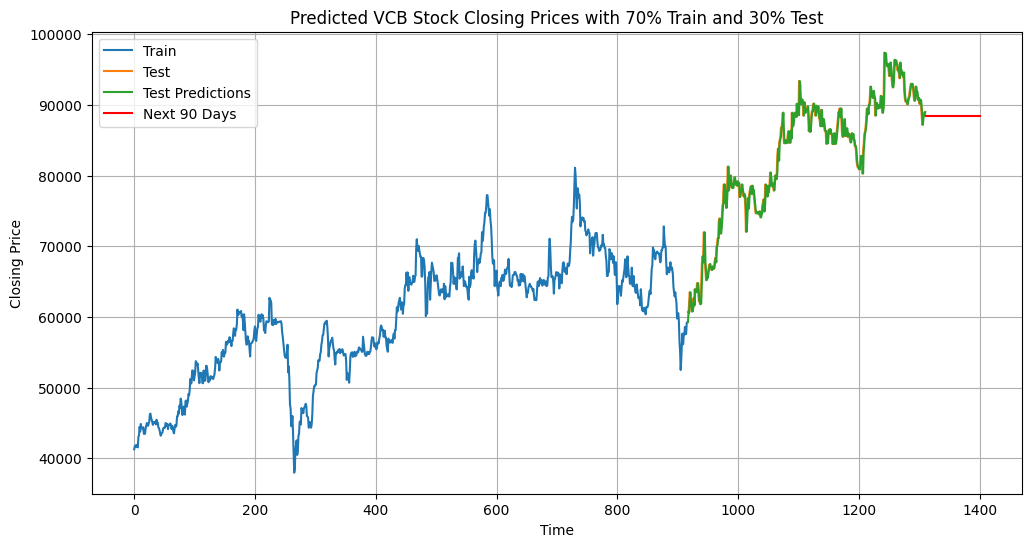

In [71]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, color='red', label='Next 90 Days')

# Adding titles and labels
plt.title('Predicted VCB Stock Closing Prices with 70% Train and 30% Test')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 9:1

In [72]:
df = pd.read_csv('/content/VCB.VN-BaoCao.csv')

In [73]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,40478.953125,41275.257813,40346.234375,41275.257813,41275.257813,1225908.0
1,2019-03-04,41275.257813,41806.132813,41275.257813,41673.414063,41673.414063,2030592.0
2,2019-03-05,41673.414063,42337.003906,41474.335938,41806.132813,41806.132813,2376092.0
3,2019-03-06,41872.488281,42005.207031,41076.183594,41607.054688,41607.054688,2107101.0
4,2019-03-07,41607.054688,42337.003906,41540.695313,41872.488281,41872.488281,3091640.0


In [74]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [75]:
# Split the data into training, testing sets
train_size = int(0.9 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

In [76]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [77]:
# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=0, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(model.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19838.711, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19834.771, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19836.740, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19836.744, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19834.194, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.597 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1179
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9916.097
Date:                Wed, 19 Jun 2024   AIC                          19834.194
Time:                        15:23:41   BIC                          19839.265
Sample:                             0   HQIC                         19836.106
                               - 1179                                  

In [78]:
order = (model.order[0], model.order[1], model.order[2])
print(order)

(0, 1, 0)


In [79]:
from statsmodels.tsa.arima.model import ARIMA
def evaluate_ariama_model(x_data, y_data, order):
    y_pred = list()
    history = [x for x in y_train]
    for t in range(len(y_data)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        y_pred.append(yhat)
        obs = y_data[t]
        history.append(obs)
    mse = mean_squared_error(y_data, y_pred)
    mae = mean_absolute_error(y_data, y_pred)
    mape = mean_absolute_percentage_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

In [80]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred, test_mse, test_mae, test_mape, test_rmse = evaluate_ariama_model(x_test, y_test, order)

print("Price predict on test data:", y_pred)
print("MSE on test data:", test_mse)
print("MAE on test data:", test_mae)
print("MAPE on test data:", test_mape)
print("RMSE on test data:", test_rmse)

Price predict on test data: [86100.0, 86600.0, 86700.0, 85500.0, 86000.0, 85800.0, 85800.0, 85100.0, 84700.0, 85000.0, 86000.0, 85400.0, 85900.0, 85200.0, 85000.0, 84200.0, 84200.0, 83700.0, 82200.0, 81500.0, 81200.0, 81100.0, 80900.0, 80900.0, 81800.0, 82800.0, 82700.0, 82800.0, 80300.0, 83500.0, 84500.0, 85900.0, 86200.0, 86800.0, 87800.0, 89500.0, 89300.0, 88700.0, 90000.0, 90000.0, 90900.0, 92600.0, 92000.0, 91500.0, 91100.0, 91000.0, 92000.0, 91200.0, 91000.0, 88500.0, 89800.0, 90300.0, 90000.0, 89500.0, 90000.0, 89900.0, 89600.0, 90200.0, 91300.0, 91200.0, 89500.0, 88900.0, 89500.0, 91100.0, 97400.0, 97300.0, 97300.0, 96000.0, 95500.0, 95600.0, 95800.0, 95100.0, 94100.0, 94400.0, 96000.0, 95000.0, 94000.0, 93000.0, 92500.0, 93200.0, 95200.0, 96400.0, 95700.0, 96300.0, 95800.0, 95700.0, 94900.0, 95200.0, 94500.0, 93800.0, 96000.0, 94900.0, 94900.0, 94300.0, 94500.0, 94000.0, 94600.0, 92000.0, 91000.0, 90500.0, 90500.0, 90600.0, 90100.0, 90600.0, 91000.0, 91200.0, 91900.0, 92500.0,

In [81]:
last_index = len(df)-1


# Create arrays for 90 days
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict for the next 30 days
y_next_90_days = list()
history = [x for x in y_test]
for t in range(len(x_next_90_days)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    y_next_90_days.append(yhat)
    history.append(yhat)



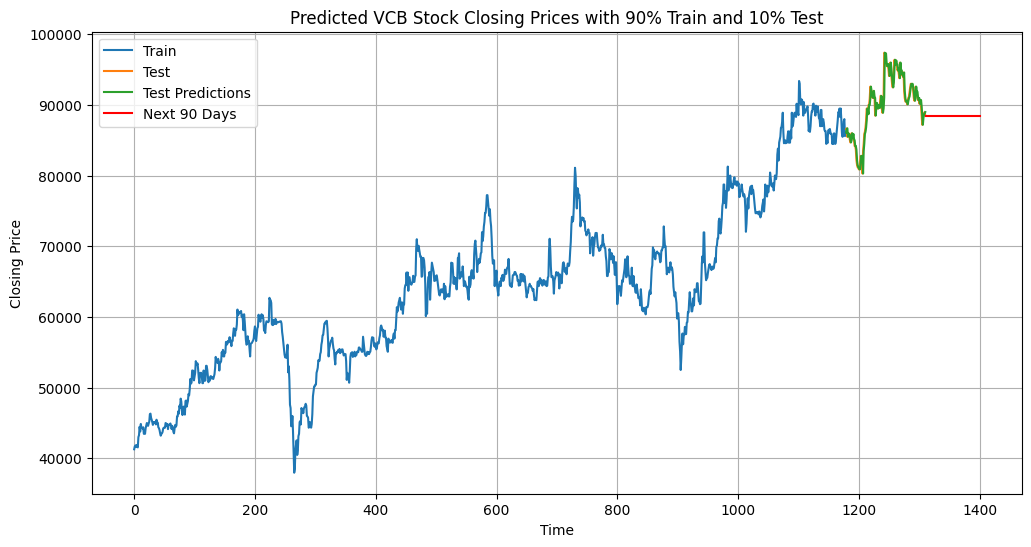

In [82]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, color='red', label='Next 90 Days')

# Adding titles and labels
plt.title('Predicted VCB Stock Closing Prices with 90% Train and 10% Test')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()